# **Natural Language Processing (NLP) and Its Importance**

Natural Language Processing (NLP) is a field of AI that focuses on the interaction between computers and human language. It enables machines to understand, interpret, and generate human language in a valuable way. NLP is crucial in today's world as it powers many applications we use daily, from voice assistants and chatbots to translation services and content analysis tools, bridging the gap between human communication and computer understanding.

### Topics Covered --->

1. `Spacy` -> An open-source library for advanced NLP in Python, known for its speed and accuracy in processing and analyzing text.

2. `NLTK` -> Natural Language Toolkit, a leading platform for building Python programs to work with human language data, offering easy-to-use interfaces to lexical resources.

3. `Tokenization` -> The process of breaking down text into smaller units (tokens) such as words, phrases, or sentences for further processing and analysis.

4. `Language Processing` -> Techniques and methods used to analyze and understand human language, including syntax, semantics, and context.

5. `Pipelines in spacy` -> A series of processing steps in spaCy that text goes through, including tokenization, part-of-speech tagging, and entity recognition.

6. `Stemming` -> The process of reducing words to their root or base form, helping to normalize text for analysis.

7. `Lemmatization` -> Similar to stemming, but produces the dictionary form of a word, which is more meaningful and linguistically correct.

8. `Part of speech (POS) tagging` -> Assigning grammatical categories (e.g., noun, verb, adjective) to each word in a text.

9. `Named Entity Recognition (NER)` -> Identifying and classifying named entities (e.g., person names, organizations, locations) in text.

10. `One hot Encoding` -> A method of representing categorical variables as binary vectors, often used in text classification tasks.

11. `Text representation using Bag of Words (BOW)` -> A simple way to represent text data as a collection of word counts, disregarding grammar and word order.

12. `Spam / Ham classifier using Naive Bayes + BOW` -> A common application of NLP for email filtering, using probabilistic classification and bag-of-words representation.

13. `Stop Words in NLP` -> Common words (e.g., "the", "is", "at") often removed from text before processing to focus on more meaningful content.

14. `Text representation using Bag of n-grams` -> An extension of BOW that captures sequences of n words, preserving some context and order information.

15. `Text representation using TF-IDF` -> Term Frequency-Inverse Document Frequency, a numerical statistic reflecting the importance of a word in a document within a collection.

16. `Text representation using Word Embeddings` -> Dense vector representations of words that capture semantic relationships between words.

17. `Word vectors in Spacy` -> Pre-trained word embeddings available in spaCy, used for various NLP tasks.

18. `News classification using spacy word vectors` -> Categorizing news articles into topics using spaCy's word vector representations.

19. `Word vectors in Gensim` -> Another popular library for working with word embeddings and topic modeling.

20. `News classification using Gensim word vectors` -> Similar to spaCy-based classification, but using Gensim's implementation of word vectors.

21. `fastText` -> A library for efficient learning of word representations and sentence classification, known for handling rare words well.

# **Basic Implementation of spaCy & NLTK**

spaCy -> Newer Library, Already comes tuned with spacy.load("en_core_web_sm")

NLTK  -> Older Library, Can be heavily customised but hard to operate with

In [1]:
import nltk 
import spacy

nlp = spacy.load("en_core_web_sm")

In [2]:
doc = nlp("I like black cats. Dr. Ramesh likes brown dogs. There are a lot of people that I know of that have multiple pets. For example Koompilala, Dhunnibaba etc. because Having pets is cute.")
for sentence in doc.sents:
    print(sentence)
    
# for sentence in doc.sents:          
#     for word in sentence:                   #This prints all words one by one.
#         print(word)  

I like black cats.
Dr. Ramesh likes brown dogs.
There are a lot of people that I know of that have multiple pets.
For example Koompilala, Dhunnibaba etc. because Having pets is cute.


In [3]:
from nltk.tokenize import sent_tokenize

sent_tokenize("I like black cats. Dr. Ramesh likes brown dogs. There are a lot of people that I know of that have multiple pets. For example Koompilala, Dhunnibaba etc. because Having pets is cute.")

['I like black cats.',
 'Dr. Ramesh likes brown dogs.',
 'There are a lot of people that I know of that have multiple pets.',
 'For example Koompilala, Dhunnibaba etc.',
 'because Having pets is cute.']

# **Tokenization in spaCY**

In [4]:
#Word Tokenization -> 
import spacy
nlp = spacy.blank('en')

doc = nlp("Let's go to N.Y!")

for token in doc:
    print(token) 

Let
's
go
to
N.Y
!


In [5]:
span = doc[2:4]
type(nlp) , type(doc) , type(token) , type(span)

(spacy.lang.en.English,
 spacy.tokens.doc.Doc,
 spacy.tokens.token.Token,
 spacy.tokens.span.Span)

In [6]:
doc = nlp ("I have 2 two ₹ coins in my pocket.")

doc[2].like_num , doc[3].like_num , doc[4].is_currency, doc[5].is_digit

(True, True, True, False)

In [7]:
student_details = """
John Smith, 19, john.smith@email.com, 2005-03-15
Emily Johnson, 21, emily.j@university.edu, 2003-07-22
Michael Chen, 20, mchen98@student.org, 2004-11-30
Sophia Rodriguez, 18, srodriguez@school.net, 2006-01-08
Alexander Kim, 22, akim2002@college.com, 2002-09-04
"""
doc = nlp(student_details)
email_array =[]
for token in doc:
    if token.like_email:
        email_array.append(token.text)
        
        
print(email_array)

['john.smith@email.com', 'emily.j@university.edu', 'mchen98@student.org', 'srodriguez@school.net', 'akim2002@college.com']


In [8]:
#This is how we add components to pipelines -> 
print(nlp.pipe_names)

nlp.add_pipe('sentencizer')

print(nlp.pipe_names)


[]
['sentencizer']


In [9]:
text='''
Look for data to help you address the question. Governments are good
sources because data from public research is often freely available. Good
places to start include http://www.data.gov/, and http://www.science.
gov/, and in the United Kingdom, http://data.gov.uk/.
Two of my favorite data sets are the General Social Survey at http://www3.norc.org/gss+website/, 
and the European Social Survey at http://www.europeansocialsurvey.org/.
'''

for url in nlp(text): 
    if url.like_url:
        print(url)

http://www.data.gov/
http://www.science
http://data.gov.uk/.
http://www3.norc.org/gss+website/
http://www.europeansocialsurvey.org/.


In [10]:
transactions = "Tony gave two $ to Peter, Bruce gave 500 € to Steve"
doc = nlp(transactions)

for token in doc:
    if token.like_num and doc[token.i+1].is_currency:
        print(token.text , doc[token.i+1].text)


two $
500 €


# **Language Processing Pipeline in spaCy**

In [11]:
import spacy

nlp = spacy.blank('en')

print(nlp.pipe_names)

#Already trained NLP Pipeline -> 
nlp = spacy.load('en_core_web_sm')

print(nlp.pipe_names)


[]
['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


In [12]:
complex_sentence = "Yesterday, 42 enthusiastic students from our local high school eagerly participated in the 15th annual science fair, where they showcased 7 innovative projects."
doc = nlp(complex_sentence)

for token in doc:
    
    print(f"{token.text:<15} {token.lemma_:<15} {token.pos_:<5}")


Yesterday       yesterday       NOUN 
,               ,               PUNCT
42              42              NUM  
enthusiastic    enthusiastic    ADJ  
students        student         NOUN 
from            from            ADP  
our             our             PRON 
local           local           ADJ  
high            high            ADJ  
school          school          NOUN 
eagerly         eagerly         ADV  
participated    participate     VERB 
in              in              ADP  
the             the             DET  
15th            15th            ADJ  
annual          annual          ADJ  
science         science         NOUN 
fair            fair            NOUN 
,               ,               PUNCT
where           where           SCONJ
they            they            PRON 
showcased       showcase        VERB 
7               7               NUM  
innovative      innovative      ADJ  
projects        project         NOUN 
.               .               PUNCT


In [13]:
doc = nlp("Real Madrid FC has scored many goals in last 5 games, Increasing their valuation by 3 million $.")

for ent in doc.ents:
    print(f"{ent.text:<25} {ent.label_:<15} {spacy.explain(ent.label_)}")
    
    
from spacy import displacy

displacy.render(doc, style ="ent")

Real Madrid FC            ORG             Companies, agencies, institutions, etc.
last 5                    DATE            Absolute or relative dates or periods
3 million $               MONEY           Monetary values, including unit


In [14]:
#Code to only create a pipeline with ner rather than all the entities --> 

source_nlp = spacy.load('en_core_web_sm')

nlp = spacy.blank('en')

nlp.add_pipe('ner', source=source_nlp)

nlp.pipe_names

['ner']

# **Stemming and Lemmatization ->** 

**Stemming** -> Getting the base word out of a complex word. It just uses simple rules like removing "able", "ing" etc. Examples -> 

- Talking -> Talk
- Adjustable -> Adjust


**Lemmatization** -> Getting the base word by using linguistic knowledge and not just fixed rules. Base word is also called lemma. Examples -> 
- Ate -> Eat
- Ability -> Able

In [15]:
import nltk 
import spacy

In [16]:
from nltk import PorterStemmer
stemmer = PorterStemmer()

words = [
    "running", "jumps", "easily", "dogs", "cats", "better", "friendliness", "jumping", "leaves", "babies", "ability", "organization", "programmer"
]

for word in words : 
    print(f"{word:<15} {stemmer.stem(word)}")

running         run
jumps           jump
easily          easili
dogs            dog
cats            cat
better          better
friendliness    friendli
jumping         jump
leaves          leav
babies          babi
ability         abil
organization    organ
programmer      programm


Stemming doesn't use language comphrehension and thus its results are not the best.

In [17]:
nlp = spacy.load("en_core_web_sm")

doc = nlp("running jumps easily dogs cats better friendliness jumping leaves babies ability organization programmer")

for token in doc:
    print(f"{token.text:<15} {token.lemma_}")


running         running
jumps           jump
easily          easily
dogs            dog
cats            cat
better          well
friendliness    friendliness
jumping         jump
leaves          leave
babies          baby
ability         ability
organization    organization
programmer      programmer


# **Part Of Speech POS Tagging ->**

In [18]:
import spacy
nlp = spacy.load('en_core_web_sm')

short_sentence = "The curious cat quickly chased five red butterflies across our sunny garden yesterday."

doc = nlp(short_sentence)

for token in doc:
    print(f"{token.text:<12} {token.pos_:<10} {spacy.explain(token.pos_):<15} {token.tag_:<10} {spacy.explain(token.tag_)}")

The          DET        determiner      DT         determiner
curious      ADJ        adjective       JJ         adjective (English), other noun-modifier (Chinese)
cat          NOUN       noun            NN         noun, singular or mass
quickly      ADV        adverb          RB         adverb
chased       VERB       verb            VBD        verb, past tense
five         NUM        numeral         CD         cardinal number
red          ADJ        adjective       JJ         adjective (English), other noun-modifier (Chinese)
butterflies  NOUN       noun            NNS        noun, plural
across       ADP        adposition      IN         conjunction, subordinating or preposition
our          PRON       pronoun         PRP$       pronoun, possessive
sunny        ADJ        adjective       JJ         adjective (English), other noun-modifier (Chinese)
garden       NOUN       noun            NN         noun, singular or mass
yesterday    NOUN       noun            NN         noun, singul

In [19]:
earnings_text="""Microsoft Corp. today announced the following results for the quarter ended December 31, 2021, as compared to the corresponding period of last fiscal year:

·         Revenue was $51.7 billion and increased 20%
·         Operating income was $22.2 billion and increased 24%
·         Net income was $18.8 billion and increased 21%
·         Diluted earnings per share was $2.48 and increased 22%
“Digital technology is the most malleable resource at the world’s disposal to overcome constraints and reimagine everyday work and life,” said Satya Nadella, chairman and chief executive officer of Microsoft. “As tech as a percentage of global GDP continues to increase, we are innovating and investing across diverse and growing markets, with a common underlying technology stack and an operating model that reinforces a common strategy, culture, and sense of purpose.”
“Solid commercial execution, represented by strong bookings growth driven by long-term Azure commitments, increased Microsoft Cloud revenue to $22.1 billion, up 32% year over year” said Amy Hood, executive vice president and chief financial officer of Microsoft."""

doc = nlp(earnings_text)

filtered_tokens = []

for token in doc:
    if token.pos_ not in ["SPACE", "PUNCT", "X"]:
        filtered_tokens.append(token)
        
filtered_tokens[:10]

[Microsoft,
 Corp.,
 today,
 announced,
 the,
 following,
 results,
 for,
 the,
 quarter]

In [20]:
count = doc.count_by(spacy.attrs.POS)
for k,v in count.items():
    print(doc.vocab[k].text, "|",v)

PROPN | 15
NOUN | 45
VERB | 23
DET | 9
ADP | 16
NUM | 16
PUNCT | 27
SCONJ | 1
ADJ | 20
SPACE | 10
AUX | 6
SYM | 5
CCONJ | 12
ADV | 3
PART | 3
PRON | 2


# **Named Entity Recognition (NER) ->**

In [21]:
import spacy 

nlp = spacy.load("en_core_web_sm")

nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [22]:
text = "Apple Inc. is planning to open a new store in New York City next month. CEO Tim Cook announced the plan during a conference in San Francisco last week. Twitter is the most popular social media platform in the world."

doc = nlp(text)

for ent in doc.ents:
    print(f"{ent.text:<20} {ent.label_:<15} {spacy.explain(ent.label_):<20}")
    
    


Apple Inc.           ORG             Companies, agencies, institutions, etc.
New York City        GPE             Countries, cities, states
next month           DATE            Absolute or relative dates or periods
Tim Cook             PERSON          People, including fictional
San Francisco        GPE             Countries, cities, states
last week            DATE            Absolute or relative dates or periods


In [23]:
#As Twitter is not included in spacy, we can add it manually.

from spacy.tokens import Span

s1 = Span(doc,31,32,label="ORG")
new_ents = list(doc.ents)
new_ents.append(s1)
doc.ents = new_ents

for ent in doc.ents:
    print(f"{ent.text:<20} {ent.label_:<15} {spacy.explain(ent.label_):<20}")

Apple Inc.           ORG             Companies, agencies, institutions, etc.
New York City        GPE             Countries, cities, states
next month           DATE            Absolute or relative dates or periods
Tim Cook             PERSON          People, including fictional
San Francisco        GPE             Countries, cities, states
last week            DATE            Absolute or relative dates or periods
Twitter              ORG             Companies, agencies, institutions, etc.


# **One Hot Encoding ->**

For A, B, C, D, E, F, The One Hot Encoding can be -> 

A -> [1, 0, 0, 0, 0, 0]

B -> [0, 1, 0, 0, 0, 0]

C -> [0, 0, 1, 0, 0, 0]

D -> [0, 0, 0, 1, 0, 0]

E -> [0, 0, 0, 0, 1, 0]

F -> [0, 0, 0, 0, 0, 1]

**One Hot Encoding takes a lot of space and causes Out of Vocabulary Problems + It also doesnt have fixed length representation**

# **Text Representation Using Bag Of Words (BOW)->**

## **Spam Detection using BOW ->**

In [24]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

import torch
import spacy

In [25]:
df = pd.read_csv("data/spam_detection.csv")

In [26]:
df[8:14]

,Category,Message
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
10,ham,I'm gonna be home soon and i don't want to tal...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
12,spam,URGENT! You have won a 1 week FREE membership ...
13,ham,I've been searching for the right words to tha...


In [27]:
df.Category.value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [28]:
#Creating a column in the dataframe for spam & ham. Spam -> 1 & Ham -> 0 

df["Value"] = df["Category"].apply(lambda x : 1 if x=='spam' else 0 ) 

    
df.head()

,Category,Message,Value
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train , y_test = train_test_split(df.Message, df.Value, test_size = 0.2, random_state=42)

In [30]:
X_train.shape , X_test.shape, type(X_train), X_train[:3], y_train[:3]

((4457,),
 (1115,),
 pandas.core.series.Series,
 1978    Reply to win £100 weekly! Where will the 2006 ...
 3989    Hello. Sort of out in town already. That . So ...
 3935     How come guoyang go n tell her? Then u told her?
 Name: Message, dtype: object,
 1978    1
 3989    0
 3935    0
 Name: Value, dtype: int64)

This makes the word count/frequency array -> 

In [31]:
from sklearn.feature_extraction.text import CountVectorizer 

v = CountVectorizer()

X_train_cv = v.fit_transform(X_train.values)
X_train_cv.shape

(4457, 7701)

^ 4457 Emails wit 7824 Total Vocab Size ( BOW )

In [32]:
v.get_feature_names_out()[2000:2050] , v.get_feature_names_out().shape

(array(['copied', 'copies', 'coping', 'cops', 'copy', 'cornwall',
        'corporation', 'corrct', 'correct', 'correction', 'correctly',
        'corrupt', 'cos', 'cosign', 'cost', 'costa', 'costing', 'costs',
        'costume', 'couch', 'cougar', 'cough', 'could', 'coulda', 'couldn',
        'count', 'countin', 'countinlots', 'country', 'counts', 'coupla',
        'couple', 'courage', 'courageous', 'course', 'court', 'cover',
        'coveragd', 'covers', 'coz', 'cozy', 'cr', 'cr01327bt', 'cr9',
        'crab', 'crack', 'craigslist', 'crammed', 'cramps', 'crap'],
       dtype=object),
 (7701,))

In [33]:
X_train_np = X_train_cv.toarray()
X_train_np[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
np.where(X_train_np[0]!=0)

(array([ 258,  354,  694, 1271, 2106, 2568, 2805, 3364, 5687, 5980, 5999,
        6460, 6773, 6888, 7396, 7437, 7471, 7474, 7555], dtype=int64),)

In [35]:
X_train[:4][1978]

'Reply to win £100 weekly! Where will the 2006 FIFA World Cup be held? Send STOP to 87239 to end service'

In [36]:
v.get_feature_names_out()[7396],v.get_feature_names_out()[7437],v.get_feature_names_out()[7555]

#First email has the word "asked" in it. Similarly it has the other words with the indexes above. So this is how BOW stores the indexes. Suppose the index 2222 has the word "Venus" and it is not present in the email 1232's indexes as value 1, Then the word "Venus" doesn't come in the email. 

('weekly', 'where', 'world')

In [37]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

model.fit(X_train_cv , y_train)

MultinomialNB()

In [38]:
X_test_cv = v.transform(X_test.values)

In [39]:
from sklearn.metrics import classification_report

y_test_pred = model.predict(X_test_cv)

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       966
           1       1.00      0.94      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



In [40]:
sample_emails = []
email=""
while email!="quit":
    email = (input("Enter the email that you want to classify. Type quit to stop. "))
    sample_emails.append(email)
    
sample_emails.pop() #Removing the "quit"

#Writing code to transform this email array and then pass it through the model to predict using model.predict and then printing the results.
emails = v.transform(sample_emails)
pred = model.predict(emails)

for email, prediction in zip(sample_emails, pred):
    print("Your input -> ")
    print(email)
    print("Classification:", "Spam" if prediction == 1 else "Not Spam/Ham", "\n")


Your input -> 
Join course about marketing for only 24.99$ per hour
Classification: Spam 

Your input -> 
Watch these paid for free movies from our platform abc.tv for more rewards!
Classification: Not Spam/Ham 

Your input -> 
Win 50000$ worth bitcoin by clicking on this link
Classification: Spam 

Your input -> 
Dear Friend, How are you doing?
Classification: Not Spam/Ham 



## **Easier Way of Implementing the same logic ->**

In [41]:
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])


clf.fit(X_train, y_train)


Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [42]:
pred = clf.predict(X_test)
print(classification_report(y_true=y_test, y_pred=pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       966
           1       1.00      0.94      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



# **Stop Words in NLP ->**

Stop words are the most common words in English. They are usually not useful in NLP. They are often used for filtering out irrelevant words.

Example of stop words -> I, me, my, mine, this, that, not etc.

Example of Usage of Stop Words -> This is a good movie / This is not a good movie -> Good Movie

Stop words are useful in many tasks as they make the working efficient, But they are not useful in tasks like **Machine Translation , Sentiment Classification , ChatBot** etc.

In [43]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

list(STOP_WORDS)[10:21] , len(STOP_WORDS)

(['had',
  'whether',
  'you',
  'are',
  'alone',
  'might',
  'could',
  'amount',
  '’ve',
  'whatever',
  'these'],
 326)

In [44]:
nlp = spacy.load('en_core_web_sm')

doc = nlp("We just opened our wings, The flying part is coming soon!")

for token in doc:
    if token.is_stop:
        print(token)

We
just
our
The
part
is


In [45]:
def preprocess(text):
    
    doc = nlp(text)
    
    no_stop_words = [token.text for token in doc if not token.is_stop and not token.is_punct]
    
    return " ".join(no_stop_words)
            
    

In [46]:
preprocess("The other is not other and not the same but your divine brother")

'divine brother'

In [47]:
import pandas as pd
df = pd.read_json("data/departmentOfJusticePressRelease.json", lines  = True)


In [48]:
df.head()

,id,title,contents,date,topics,components
0,None,Convicted Bomb Plotter Sentenced to 30 Years,"PORTLAND, Oregon. – Mohamed Osman Mohamud, 23,...",2014-10-01T00:00:00-04:00,[],[National Security Division (NSD)]
1,12-919,$1 Million in Restitution Payments Announced t...,WASHINGTON – North Carolina’s Waccamaw River...,2012-07-25T00:00:00-04:00,[],[Environment and Natural Resources Division]
2,11-1002,$1 Million Settlement Reached for Natural Reso...,BOSTON– A $1-million settlement has been...,2011-08-03T00:00:00-04:00,[],[Environment and Natural Resources Division]
3,10-015,10 Las Vegas Men Indicted \r\nfor Falsifying V...,WASHINGTON—A federal grand jury in Las Vegas...,2010-01-08T00:00:00-05:00,[],[Environment and Natural Resources Division]
4,18-898,$100 Million Settlement Will Speed Cleanup Wor...,"The U.S. Department of Justice, the U.S. Envir...",2018-07-09T00:00:00-04:00,[Environment],[Environment and Natural Resources Division]


In [49]:
df.shape

(13087, 6)

In [50]:
df = df[df["topics"].str.len()!=0]
df.head()

,id,title,contents,date,topics,components
4,18-898,$100 Million Settlement Will Speed Cleanup Wor...,"The U.S. Department of Justice, the U.S. Envir...",2018-07-09T00:00:00-04:00,[Environment],[Environment and Natural Resources Division]
7,14-1412,14 Indicted in Connection with New England Com...,A 131-count criminal indictment was unsealed t...,2014-12-17T00:00:00-05:00,[Consumer Protection],[Civil Division]
19,17-1419,2017 Southeast Regional Animal Cruelty Prosecu...,The United States Attorney’s Office for the Mi...,2017-12-14T00:00:00-05:00,[Environment],"[Environment and Natural Resources Division, U..."
22,15-1562,21st Century Oncology to Pay $19.75 Million to...,"21st Century Oncology LLC, has agreed to pay $...",2015-12-18T00:00:00-05:00,"[False Claims Act, Health Care Fraud]",[Civil Division]
23,17-1404,21st Century Oncology to Pay $26 Million to Se...,21st Century Oncology Inc. and certain of its ...,2017-12-12T00:00:00-05:00,"[Health Care Fraud, False Claims Act]","[Civil Division, USAO - Florida, Middle]"


In [51]:
df = df.head(100)

df.shape

(100, 6)

In [52]:
len(df["contents"].iloc[4])

5504

In [53]:
df["new_contents"] = df["contents"].apply(preprocess)

In [54]:
len(df["new_contents"].iloc[4])

4217

In [55]:
print(df["contents"].iloc[7][:300])

Federal agents have arrested 17 members and associates of the Nine Trey Gangster Bloods criminal street gang on charges of RICO conspiracy and related charges stemming from an indictment returned by a federal grand jury in the Northern District of Georgia on Oct. 12, which was unsealed yesterday.  A


In [56]:
print(df["new_contents"].iloc[7][:300])

Federal agents arrested 17 members associates Trey Gangster Bloods criminal street gang charges RICO conspiracy related charges stemming indictment returned federal grand jury Northern District Georgia Oct. 12 unsealed yesterday    total 30 gang members associates indicted Acting Assistant Attorney 


# **Text Representation Using Bag Of n-grams ->**

Base Sentence -> I sat on a sofa and ate icecream

Our previous approaches do not capture the semantic relationships between words. The sentence, I sat on a icecream and ate sofa also has the exact same representation as the previous sentence.

Thus we use **Bag of n-grams** -> A representation that captures the relationships between words in a sentence.

Example of Bi-gram for the base sentence -> 
- **I sat**.....**sat on**.....**on a**.....**a sofa**.....**sofa and**.....**and ate**.....**ate icecream**.....**icecream.**

Example of Tri-gram for the base sentence -> 
- **I sat on**.....**on a sofa**.....**sofa and**.....**and ate icecream**.....**icecream.**

Similarly, we can create n-grams for any sentence.

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer(ngram_range=(2,2)) #Bigram 

v.fit(["I sat on a sofa and ate icecream"])
v.vocabulary_

{'sat on': 3, 'on sofa': 2, 'sofa and': 4, 'and ate': 0, 'ate icecream': 1}

In [58]:
import spacy

nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    
    doc = nlp(text)
    
    no_stop_words = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    
    return " ".join(no_stop_words)

In [59]:
preprocess("Loki is eating icecream")

'Loki eat icecream'

In [60]:
corpus = [
    "I sat on a sofa and ate icecream",
    "Lot of people that I know of that have multiple pets. Like Koompilala, because having pets is cute.",
    "I like chocolate icecream"
]

In [61]:
processed_corpus = []

for text in corpus:
    processed_corpus.append(preprocess(text))
    
processed_corpus

['sit sofa eat icecream',
 'lot people know multiple pet like Koompilala have pet cute',
 'like chocolate icecream']

In [62]:
v = CountVectorizer(ngram_range=(1,2))

v.fit(processed_corpus)

v.vocabulary_

{'sit': 24,
 'sofa': 26,
 'eat': 3,
 'icecream': 7,
 'sit sofa': 25,
 'sofa eat': 27,
 'eat icecream': 4,
 'lot': 15,
 'people': 19,
 'know': 8,
 'multiple': 17,
 'pet': 21,
 'like': 12,
 'koompilala': 10,
 'have': 5,
 'cute': 2,
 'lot people': 16,
 'people know': 20,
 'know multiple': 9,
 'multiple pet': 18,
 'pet like': 23,
 'like koompilala': 14,
 'koompilala have': 11,
 'have pet': 6,
 'pet cute': 22,
 'chocolate': 0,
 'like chocolate': 13,
 'chocolate icecream': 1}

In [63]:
v.transform(["koompilala eats icecream. koompilala likes icecream. koompilala doesnt eat chocolate icecream."]).toarray()

array([[1, 1, 0, 1, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]], dtype=int64)

In [64]:
#News category classifier using Bag of n-grams -> 

df = pd.read_json("data/news_dataset.json") #This kaggle dataset has 4 categories.

df.head(3)

,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS


In [65]:
df.category.value_counts()

category
BUSINESS    4254
SPORTS      4167
CRIME       2893
SCIENCE     1381
Name: count, dtype: int64

In [66]:
#Undersampling as unbalanced dataset -> 

min_samples = 1381

df_business = df[df["category"]=="BUSINESS"].sample(min_samples , random_state=8888)

df_science = df[df["category"]=="SCIENCE"].sample(min_samples , random_state=8888)

df_crime = df[df["category"]=="CRIME"].sample(min_samples , random_state=8888)

df_sports = df[df["category"]=="SPORTS"].sample(min_samples , random_state=8888)

In [67]:
df_undersampled_balanced = pd.concat([df_business, df_science, df_crime, df_sports] , axis = 0)

df_undersampled_balanced.category.value_counts()

category
BUSINESS    1381
SCIENCE     1381
CRIME       1381
SPORTS      1381
Name: count, dtype: int64

In [68]:


df_undersampled_balanced["category_number"] = df_undersampled_balanced.category.map(
    {"BUSINESS":0, "SCIENCE":1, "CRIME":2, "SPORTS":3}
    )

df_undersampled_balanced

,text,category,category_number
6670,Matching Organizational Capabilities to Design...,BUSINESS,0
3799,Walmart Is Always Watching Its Workers Walmart...,BUSINESS,0
9271,JPMorgan Hackers Didn't Steal Any Money: Report,BUSINESS,0
2793,Elite Daily's 25-Year-Old CEO: How He Got Zero...,BUSINESS,0
9259,How Americans Get Duped Into Buying Endangered...,BUSINESS,0
...,...,...,...
1382,"TMZ: Lamar Odom Spent $75,000 At Nevada Brothe...",SPORTS,3
3046,'Kaep'tain America: This Is What A Patriot Loo...,SPORTS,3
12272,Curt Schilling Says Trump Eyeing A 10-Year-Old...,SPORTS,3
9095,"Hey, Here's Roger Goodell Laughing At A Concus...",SPORTS,3


In [69]:
from sklearn.model_selection import train_test_split

X_train , X_test, y_train, y_test = train_test_split(df_undersampled_balanced.text,
                                                     df_undersampled_balanced.category_number,
                                                     test_size=0.25, 
                                                     random_state=8888,
                                                     stratify=df_undersampled_balanced.category_number)

#Stratify ensures equal or similar to equal split
len(X_train), len(y_train) , len(X_test), len(y_test)

(4143, 4143, 1381, 1381)

In [70]:
y_train.value_counts()

category_number
2    1036
1    1036
0    1036
3    1035
Name: count, dtype: int64

Without n-gram -> 

In [71]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf = Pipeline(
    [
        ('vectorizer_bow', CountVectorizer()),
        ('Multi Naive Bayes', MultinomialNB())
    ]
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

y_pred

print(classification_report(y_true=y_test, y_pred=y_pred))


              precision    recall  f1-score   support

           0       0.79      0.89      0.84       345
           1       0.89      0.81      0.85       345
           2       0.89      0.89      0.89       345
           3       0.89      0.84      0.87       346

    accuracy                           0.86      1381
   macro avg       0.86      0.86      0.86      1381
weighted avg       0.86      0.86      0.86      1381



Bigram -> 

In [72]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf = Pipeline(
    [
        ('vectorizer_bow', CountVectorizer(ngram_range=(1,2))),
        ('Multi Naive Bayes', MultinomialNB())
    ]
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

y_pred

print(classification_report(y_true=y_test, y_pred=y_pred))


              precision    recall  f1-score   support

           0       0.71      0.92      0.80       345
           1       0.92      0.76      0.83       345
           2       0.89      0.89      0.89       345
           3       0.92      0.81      0.86       346

    accuracy                           0.84      1381
   macro avg       0.86      0.84      0.85      1381
weighted avg       0.86      0.84      0.85      1381



In [73]:
X_test[20:25]

11164    Women in Business Q&A: Alexandra Voris and Mag...
3797     Were Dinosaurs Cold-Blooded Or Warm-Blooded? O...
11809    Comcast In Talks To Buy DreamWorks Animation F...
9325     Michael Jordan Watched UNC Lose The NCAA Title...
7486     Shootout With Hit And Run Suspect Leaves Utah ...
Name: text, dtype: object

In [74]:
y_test[20:25]

11164    0
3797     1
11809    0
9325     3
7486     2
Name: category_number, dtype: int64

In [75]:
y_pred[20:25]

array([0, 1, 0, 3, 2], dtype=int64)

#### Creating a preprocessed column and then training the model on it -> 

In [76]:

df_undersampled_balanced['preprocessed_text'] = df_undersampled_balanced.text.apply(preprocess)

In [77]:
df_undersampled_balanced.head()

,text,category,category_number,preprocessed_text
6670,Matching Organizational Capabilities to Design...,BUSINESS,0,Matching Organizational Capabilities Design Ex...
3799,Walmart Is Always Watching Its Workers Walmart...,BUSINESS,0,Walmart watch worker Walmart consider Organi...
9271,JPMorgan Hackers Didn't Steal Any Money: Report,BUSINESS,0,JPMorgan Hackers steal money report
2793,Elite Daily's 25-Year-Old CEO: How He Got Zero...,BUSINESS,0,Elite Daily 25 year Old CEO get Zero 40 millio...
9259,How Americans Get Duped Into Buying Endangered...,BUSINESS,0,Americans dupe buy Endangered Animal Items com...


In [78]:
X_train, X_test, y_train, y_test = train_test_split(df_undersampled_balanced.preprocessed_text,
                                                     df_undersampled_balanced.category_number,
                                                     test_size=0.25, 
                                                     random_state=8888,
                                                     stratify=df_undersampled_balanced.category_number)



Without n-gram -> 


In [79]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf = Pipeline(
    [
        ('vectorizer_bow', CountVectorizer()),
        ('Multi Naive Bayes', MultinomialNB())
    ]
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

y_pred

print(classification_report(y_true=y_test, y_pred=y_pred))


              precision    recall  f1-score   support

           0       0.84      0.88      0.86       345
           1       0.89      0.80      0.84       345
           2       0.84      0.93      0.88       345
           3       0.91      0.86      0.89       346

    accuracy                           0.87      1381
   macro avg       0.87      0.87      0.87      1381
weighted avg       0.87      0.87      0.87      1381



Bigram -> 

In [80]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf = Pipeline(
    [
        ('vectorizer_bow', CountVectorizer(ngram_range=(1,2))),
        ('Multi Naive Bayes', MultinomialNB())
    ]
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

y_pred

print(classification_report(y_true=y_test, y_pred=y_pred))


              precision    recall  f1-score   support

           0       0.83      0.89      0.86       345
           1       0.92      0.80      0.86       345
           2       0.84      0.94      0.89       345
           3       0.92      0.87      0.89       346

    accuracy                           0.87      1381
   macro avg       0.88      0.87      0.87      1381
weighted avg       0.88      0.87      0.87      1381



# **Text Representation Using TF-IDF ->**

TF-IDF -> Term Frequency - Inverse Document Frequency

<img src="https://miro.medium.com/v2/resize:fit:1400/0*5eNLy2lQuaG14yke.png" style="display: block; margin: 0 auto; width: 80%;" alt="Image">


In [100]:
#Creating a corpus array with random strings for TF-IDF Vectorizer

corpus = [
    "apple apple orange orange orange apple banana orange",
    "banana orange orange banana apple orange orange orange orange grape orange",
    "grape orange banana orange orange orange",
    "kiwi mango orange orange apple"
]

from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer()

transformed_output = v.fit_transform(corpus)

print(v.vocabulary_)

{'apple': 0, 'orange': 5, 'banana': 1, 'grape': 2, 'kiwi': 3, 'mango': 4}


In [101]:
all_feature_names = v.get_feature_names_out()

for word in all_feature_names:
    
    index = v.vocabulary_.get(word)
    
    print(f"{word:<15} -> {v.idf_[index]}")
    
    #Lower -> More frequency as it is Inverse Document Frequency
    #As Orange appears the most, It has the least TFIDF Value.
    

apple           -> 1.2231435513142097
banana          -> 1.2231435513142097
grape           -> 1.5108256237659907
kiwi            -> 1.916290731874155
mango           -> 1.916290731874155
orange          -> 1.0


In [102]:
print(corpus[:2])

print(transformed_output.toarray()[:2])

['apple apple orange orange orange apple banana orange', 'banana orange orange banana apple orange orange orange orange grape orange']
[[0.65946627 0.21982209 0.         0.         0.         0.71887585]
 [0.15956053 0.31912106 0.197089   0.         0.         0.91315832]]


In [104]:
import pandas as pd

df = pd.read_csv('data/ecommerce_data.csv')

df

,Text,label
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household
1,"Contrast living Wooden Decorative Box,Painted ...",Household
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories
...,...,...
23995,Marvel Physics MCQ's for MHT - CET,Books
23996,Internet Download Manager | Lifetime License |...,Books
23997,Sadhubela's Handcrafted Iron Degchi Handi Pot ...,Household
23998,Audio-Technica AT-LP60 Automatic Belt Driven D...,Electronics


In [105]:
df.label.value_counts()

label
Household                 6000
Electronics               6000
Clothing & Accessories    6000
Books                     6000
Name: count, dtype: int64

In [107]:
df['label_number'] = df.label.map(
    {
        'Household' : 0,
        'Electronics' : 1,
        'Clothing & Accessories' : 2,
        'Books' : 3
    }
)

In [113]:
df.head() 

,Text,label,label_number
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,1
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,2
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,2


In [114]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train , y_test = train_test_split(
    
    df.Text, df.label_number, test_size=0.2, random_state=8888, stratify=df.label_number
)

len(X_train) , len(y_test)

(19200, 4800)

In [119]:
y_train.value_counts() , y_test.value_counts()

(label_number
 3    4800
 1    4800
 2    4800
 0    4800
 Name: count, dtype: int64,
 label_number
 2    1200
 1    1200
 3    1200
 0    1200
 Name: count, dtype: int64)

In [120]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf = Pipeline(
    [
        ('vectorizer_tfidf', TfidfVectorizer()),
        ('KNN' , KNeighborsClassifier())
        
    ]
)

clf.fit(X_train, y_train)

y_test_pred = clf.predict(X_test)


print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1200
           1       0.97      0.97      0.97      1200
           2       0.98      0.98      0.98      1200
           3       0.96      0.94      0.95      1200

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



In [123]:
y_test[15:20] , y_test_pred[15:20]

#Nice accuracy :))

(23574    0
 10342    0
 3158     0
 5866     3
 3944     2
 Name: label_number, dtype: int64,
 array([0, 0, 0, 3, 2], dtype=int64))

In [124]:
#Checking performance with multinomial -> 
from sklearn.naive_bayes import MultinomialNB


clf = Pipeline(
    [
        ('vectorizer_tfidf', TfidfVectorizer()),
        ('MNB' , MultinomialNB())
        
    ]
)

clf.fit(X_train, y_train)

y_test_pred = clf.predict(X_test)


print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1200
           1       0.97      0.96      0.96      1200
           2       0.98      0.99      0.98      1200
           3       0.98      0.92      0.95      1200

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



In [126]:
#Trying with random forest classifier -> 
from sklearn.ensemble import RandomForestClassifier

clf = Pipeline(
    [
        ('vectorizer_tfidf', TfidfVectorizer()),
        ('random_forest_classifer' ,RandomForestClassifier())
        
    ]
)

clf.fit(X_train, y_train)

y_test_pred = clf.predict(X_test)


print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1200
           1       0.98      0.97      0.97      1200
           2       0.98      0.98      0.98      1200
           3       0.97      0.97      0.97      1200

    accuracy                           0.97      4800
   macro avg       0.97      0.97      0.97      4800
weighted avg       0.97      0.97      0.97      4800



Random forest classifier gives the best performance for this task. Usually this comes by trial and error. 

In [146]:
#Defining a preprocessing function -> 

import spacy


nlp = spacy.load('en_core_web_sm')

def preprocess(text):
    doc = nlp(text)    
    preprocessed_text = [token.lemma_ for token in doc if not token.is_punct and not token.is_stop]
    
    return " ".join(preprocessed_text)
    

In [147]:
preprocess("Random forest classifier gives the best performance for this task")

'random forest classifier give good performance task'

In [148]:
df['preprocessed_text'] = df['Text'].apply(preprocess)

df.head()

,Text,label,label_number,preprocessed_text
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0,Urban Ladder Eisner Low Study Office Computer ...
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0,contrast live Wooden Decorative Box Painted Bo...
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,1,IO Crest SY PCI40010 PCI RAID Host Controller ...
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,2,ISAKAA Baby Socks bear 8 Years- Pack 4 6 8 12 ...
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,2,Indira Designer woman Art Mysore Silk Saree Bl...


In [149]:
X_train_preprocessed, X_test_preprocessed, y_train , y_test = train_test_split(
    
    df.preprocessed_text, df.label_number, test_size=0.2, random_state=8888, stratify=df.label_number
)

len(X_train_preprocessed) , len(y_test)

(19200, 4800)

In [151]:
from sklearn.ensemble import RandomForestClassifier
clf = Pipeline(
    [
        ('vectorizer_tfidf', TfidfVectorizer()),
        ('random_forest_classifier' , RandomForestClassifier())
        
    ]
)

clf.fit(X_train_preprocessed, y_train)

y_test_pred = clf.predict(X_test_preprocessed)


print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1200
           1       0.98      0.97      0.98      1200
           2       0.98      0.99      0.98      1200
           3       0.98      0.97      0.97      1200

    accuracy                           0.98      4800
   macro avg       0.98      0.98      0.98      4800
weighted avg       0.98      0.98      0.98      4800



The best scores with Preprocessing + Random Forest Classifier.

# **Text Representation Using Word Embeddings ->**

Theory about word embeddings already exists in the Transformer from Scratch + 3B1B Video.

## **Word vectors in Spacy ->**

In [152]:
import spacy

#en_core_web_sm doesn't have word embeddings as the size is very small. We have to use either en_core_web_md or en_core_web_lg for it.

nlp = spacy.load('en_core_web_lg')

In [154]:
doc = nlp("ice cream icecream koompilala")

for token in doc:
    
    print(f"Token -> {token.text}\nIs Vector -> {token.has_vector}\nIs Out of Vocabulary -> {token.is_oov}\n\n" )

Token -> ice
Is Vector -> True
Is Out of Vocabulary -> False


Token -> cream
Is Vector -> True
Is Out of Vocabulary -> False


Token -> icecream
Is Vector -> True
Is Out of Vocabulary -> False


Token -> koompilala
Is Vector -> False
Is Out of Vocabulary -> True




In [157]:
doc[0].vector , doc[0].vector.shape
#By default the spacy word tokens are 300 dimensional vectors

(array([ 4.1746e-01, -4.3085e-01,  4.2969e-02, -1.6576e-01,  5.0018e-01,
         3.6708e-01, -2.5552e-04,  1.5764e-01,  1.6711e-01,  1.8393e+00,
        -3.4910e-01, -2.2504e-01, -5.3077e-01,  6.0676e-01,  4.8401e-02,
        -2.1489e-01, -2.3774e-01,  1.3750e+00, -4.5353e-01, -6.0898e-02,
         9.5007e-01, -5.3369e-01,  1.9720e-01,  6.6538e-01, -1.2461e-01,
        -3.5566e-01, -7.5116e-02, -9.5728e-02,  8.2336e-02, -8.9412e-01,
        -4.1495e-01, -3.4567e-02, -3.2611e-01,  1.3591e-02,  3.0065e-01,
         2.0169e-01,  2.2861e-01, -1.9953e-01,  3.3676e-01,  4.6839e-01,
        -1.5439e-01,  4.3548e-01, -1.4746e-01,  1.7491e-01,  2.7431e-01,
         5.5184e-01, -1.9260e-01,  1.2644e-01, -1.4429e-01, -7.9206e-02,
         7.1559e-01,  2.6609e-01, -7.2920e-02, -2.1762e-01, -3.9789e-01,
        -6.3483e-01, -6.2268e-01, -1.6140e-01, -5.8972e-02,  3.2004e-01,
        -4.0484e-01,  3.1269e-01,  4.2299e-01,  1.2927e+00, -5.2837e-01,
         2.0853e-01,  1.7200e-02,  5.5035e-03, -6.9

In [211]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

base_token1 = nlp("Red Car").vector
base_token2 = nlp("Blue Car").vector
base_token3 = nlp("Red").vector
base_token4 = nlp("Blue").vector
base_token5 = nlp("Croissant").vector

#Analogy to show how the vectors are related to each other -> Red Car - Red + Blue = Blue Car

blue_car = base_token1 - base_token3 + base_token4 

print(f"Similarity between Red Car - Red + Blue & Blue Car -> {cosine_similarity(base_token2.reshape(1,-1), blue_car.reshape(1,-1)).item()}") 
print(f"\n\nSimilarity between Croissant & Blue Car -> {cosine_similarity(base_token5.reshape(1,-1), blue_car.reshape(1,-1)).item()}") 



Similarity between Red Car - Red + Blue & Blue Car -> 0.9574458599090576


Similarity between Croissant & Blue Car -> 0.02112550288438797


## **News classification using Spacy word vectors ->**

In [212]:
import pandas as pd

df = pd.read_csv("data/Fake_Real_Data.csv")

df.head()

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [214]:
df.label.value_counts()

label
Fake    5000
Real    4900
Name: count, dtype: int64

^ Almost balanced dataset

In [215]:
df['label_number'] = df.label.map({
    
    "Real" : 1, "Fake" : 0
})

In [216]:
df.head()

,Text,label,label_number
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1


In [217]:
import spacy

nlp = spacy.load('en_core_web_lg')

In [219]:

df['text_vector'] = df.Text.apply(lambda x : nlp(x).vector)

In [220]:
df.head()

,Text,label,label_number,text_vector
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0,"[-0.103623025, 0.17802684, -0.11873861, -0.034..."
1,U.S. conservative leader optimistic of common ...,Real,1,"[-0.0063406364, 0.16712041, -0.06661373, 0.017..."
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1,"[-0.122753024, 0.17192385, -0.024732638, -0.06..."
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0,"[-0.027337318, 0.12501417, -0.0073965387, -0.0..."
4,Democrats say Trump agrees to work on immigrat...,Real,1,"[-0.032708026, 0.093958504, -0.03287002, -0.00..."


In [223]:
from sklearn.model_selection import train_test_split

X_train , X_test, y_train, y_test = train_test_split(
    df.text_vector.values , df.label_number , test_size = 0.2 , random_state = 8888 , stratify = df.label_number
)

len(X_train) , len(y_test)

(7920, 1980)

In [227]:
X_train, X_train.shape

(array([array([-1.05659939e-01,  1.91267386e-01, -1.01366125e-01, -4.10028920e-02,
                7.02278018e-02,  1.28665026e-02,  3.52875926e-02, -1.01126991e-01,
               -3.97020280e-02,  1.92928255e+00, -1.59306556e-01,  3.93896066e-02,
                7.01588169e-02, -7.49223679e-02, -1.19074754e-01, -8.40078574e-03,
               -1.04384549e-01,  9.48745608e-01, -1.70093164e-01,  3.59270051e-02,
               -2.31098733e-03, -1.68278385e-02, -6.68838993e-03, -4.41042371e-02,
                3.09418552e-02,  4.90659252e-02, -1.09852917e-01, -4.51742411e-02,
                3.91390957e-02, -6.77893609e-02, -1.99695751e-02,  8.91568512e-02,
               -3.99808660e-02,  5.20413965e-02,  5.45807369e-02, -1.75197534e-02,
               -1.31705152e-02,  5.60996942e-02, -6.75287023e-02, -8.96003004e-03,
               -2.11634915e-02,  4.17205282e-02,  6.07028194e-02,  9.30339843e-03,
                6.90629022e-05,  2.97353440e-03, -1.00034721e-01,  4.30865921e-02,
    

In [228]:
#X_train , X_test is an array of which all elements are also arrays which is hard to work with for training and testing, Thus changing it to 2d array 

import numpy as np

X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)



In [231]:
X_train_2d , X_train_2d.shape

(array([[-0.10565994,  0.19126739, -0.10136613, ..., -0.071174  ,
          0.00481809,  0.06343031],
        [-0.0646969 ,  0.13155003, -0.1018946 , ..., -0.06268797,
         -0.01129996,  0.0522517 ],
        [-0.05721053,  0.16125236, -0.06184316, ..., -0.01205794,
         -0.02366299,  0.10468258],
        ...,
        [-0.04496124,  0.12807608,  0.00028395, ..., -0.03637873,
         -0.01621388,  0.09378681],
        [-0.078132  ,  0.11324193, -0.02764182, ..., -0.05222415,
         -0.01665925,  0.09508663],
        [-0.08767641,  0.18425971, -0.10849388, ..., -0.06094546,
          0.01454929,  0.04770063]], dtype=float32),
 (7920, 300))

In [232]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train_2d)
X_test_scaled = scaler.transform(X_test_2d)

clf = MultinomialNB()

clf.fit(X_train_scaled , y_train)



MultinomialNB()

In [234]:
y_test_pred = clf.predict(X_test_scaled)

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1000
           1       0.95      0.93      0.94       980

    accuracy                           0.94      1980
   macro avg       0.94      0.94      0.94      1980
weighted avg       0.94      0.94      0.94      1980



In [236]:
#Using KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train_2d)
X_test_scaled = scaler.transform(X_test_2d)

clf = KNeighborsClassifier()

clf.fit(X_train_scaled , y_train)

y_test_pred = clf.predict(X_test_scaled)

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1000
           1       0.97      0.99      0.98       980

    accuracy                           0.98      1980
   macro avg       0.98      0.98      0.98      1980
weighted avg       0.98      0.98      0.98      1980



In [237]:
#Using Random Forest 
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train_2d)
X_test_scaled = scaler.transform(X_test_2d)

clf = RandomForestClassifier()

clf.fit(X_train_scaled , y_train)

y_test_pred = clf.predict(X_test_scaled)

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1000
           1       0.96      0.98      0.97       980

    accuracy                           0.97      1980
   macro avg       0.97      0.97      0.97      1980
weighted avg       0.97      0.97      0.97      1980



KNN works the best in this case.

### **Word vectors in Gensim overview ->**

In [239]:
import gensim.downloader as api

wv = api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [262]:
#Here Similarity does not mean Synonyms from English language, The second most similar word to good is bad, Which is the antonym of it in the general sense. 

#Here the Similarity means the frequency in which 2 words appear in the same context when the model is trained on the google news articles. So words like, Profit <-> Loss even though opposites would be similar.


wv.similarity("bad" , "good")

0.7190051

In [257]:
wv.most_similar("good")

[('great', 0.7291510105133057),
 ('bad', 0.7190051078796387),
 ('terrific', 0.6889115571975708),
 ('decent', 0.6837348341941833),
 ('nice', 0.6836092472076416),
 ('excellent', 0.644292950630188),
 ('fantastic', 0.6407778263092041),
 ('better', 0.6120728850364685),
 ('solid', 0.5806034803390503),
 ('lousy', 0.576420247554779)]

In [265]:
#Doing the analogy of King - Man + Woman = Queen

wv.most_similar(positive = ["woman" , "king"] , negative = ["man"], topn=3)

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951)]

In [277]:
wv.doesnt_match(["car" , "bike" , "apple" , "truck"]), wv.doesnt_match(["coconut" , "Tesla" , "Microsoft" , "Apple"])

('apple', 'coconut')

In [278]:
#Another model -> glove trained on twitter data

glv = api.load("glove-twitter-25")

[==================================================] 100.0% 104.8/104.8MB downloaded


In [279]:
glv.similarity("bad" , "good")

0.91478705

In [282]:
glv.most_similar("good")

[('too', 0.9648017287254333),
 ('day', 0.9533665180206299),
 ('well', 0.9503170847892761),
 ('nice', 0.9438973665237427),
 ('better', 0.9425962567329407),
 ('fun', 0.9418926239013672),
 ('much', 0.9413353800773621),
 ('this', 0.9387555122375488),
 ('hope', 0.9383506774902344),
 ('great', 0.9378516674041748)]

In [283]:
glv.doesnt_match(["car" , "bike" , "apple" , "truck"]), glv.doesnt_match(["coconut" , "Tesla" , "Microsoft" , "Apple"])

('apple', 'coconut')

## **News classification using Gensim word vectors ->**

Using the same dataset that was used earlier.

In [284]:
wv = api.load("word2vec-google-news-300")


In [285]:
#Reusing the dataframe from the previous cells.
df.head(3)

,Text,label,label_number,text_vector
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0,"[-0.103623025, 0.17802684, -0.11873861, -0.034..."
1,U.S. conservative leader optimistic of common ...,Real,1,"[-0.0063406364, 0.16712041, -0.06661373, 0.017..."
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1,"[-0.122753024, 0.17192385, -0.024732638, -0.06..."


In [286]:
import spacy
nlp = spacy.load("en_core_web_lg")

def preprocess_and_vectorize(text):
    
    doc = nlp(text)
    
    filtered_tokens = []
    for token in doc: 
        if token.is_punct or token.is_stop:
            continue
        else:
            filtered_tokens.append(token.lemma_)
            
    return wv.get_mean_vector(filtered_tokens)    #This normalizes the tokens and takes the mean of all the words in the sentences in place, So the shape remains 300 but each individual token is a result of avg of that place token in all the words in the sentence.
    

In [288]:
preprocess_and_vectorize("Black White")

array([ 2.94832513e-04,  4.90293372e-04, -4.56496477e-02, -1.22061260e-02,
        6.44393563e-02, -5.43304309e-02, -4.94738780e-02,  1.82772595e-02,
        1.04514197e-01, -1.02182627e-01, -1.82314850e-02,  1.03094548e-01,
       -7.62729789e-04, -1.10014044e-02,  2.10671388e-02, -8.23516697e-02,
        5.46433032e-03,  3.66742872e-02, -8.96389633e-02, -2.67910957e-02,
        1.15908999e-02, -9.09466967e-02, -2.33612582e-03, -1.07576951e-01,
        6.67451918e-02,  1.33215100e-01, -1.59403563e-01,  3.90968733e-02,
        5.54791018e-02,  1.87283978e-02,  8.78838226e-02,  6.63226936e-03,
       -7.28880614e-02, -2.25710068e-02,  8.37985333e-03,  5.22024818e-02,
        3.14629227e-02,  1.04485378e-02,  3.50404494e-02, -2.64296271e-02,
        1.01737129e-02, -5.81589043e-02,  1.90736838e-02, -6.51494265e-02,
       -3.37531939e-02, -6.19272962e-02, -4.77060564e-02, -1.26177296e-01,
        2.25618295e-03,  2.44250856e-02,  3.05722319e-02,  3.40965018e-02,
       -4.50646654e-02, -

In [289]:
#Reusing X_train_2d and X_test_2d from the previous cells.

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

clf = GradientBoostingClassifier()

clf.fit(X_train_2d, y_train)

y_test_pred = clf.predict(X_test_2d)

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1000
           1       0.98      0.99      0.99       980

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980



Text(33.22222222222222, 0.5, 'Truth')

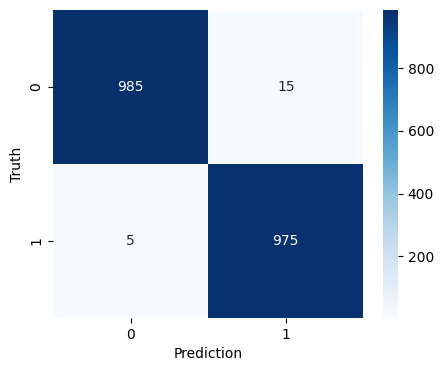

In [296]:
#Plotting the confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize=(5,4))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Prediction')
plt.ylabel('Truth')